<a href="https://colab.research.google.com/github/alejagaco/sales_predictions/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
file_name = "/content/drive/MyDrive/Coding Dojo/Data Science_Fundamentals/1_Semana/sales_predictions.csv"
df = pd.read_csv(file_name)
df.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


# Diccionario de datos


**Item_Identifier**: Identificación única del producto

**Item_Weight**: Peso del producto

**Item_Fat_Content**: Si el producto es bajo en grasa o regular

**Item_Visibility**: Porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto

**Item_Type**: Categoría a la que el producto pertenece

**Item_MRP**: Precio máximo de venta al público (precio de catálogo) del producto

**Outlet_Identifier**: Identificación única de la tienda

**Outlet_Establishment_Year**: El año en que se estableció la tienda

**Outlet_Size**: El tamaño de la tienda en cuanto al área total

**Outlet_Location_Type**: El tipo de área donde se encuentra la tienda

**Outlet_Type**: Si el punto de venta es una tienda de comestibles o algún tipo de supermercado

**Item_Outlet_Sales**: Ventas del producto en una tienda particular. Es la variable objetivo a predecir.

# 1. Cuantas filas y columnas ?

In [126]:
df.shape

(8523, 12)

# 2. Cuales son los tipos de datos en cada variable?

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# 3. ¿Hay duplicados?
 Si es el caso, eliminen algunos duplicados

In [128]:
df.duplicated().sum()

0

In [129]:
print("No hay filas duplicadas")

No hay filas duplicadas


# 4. Identifiquen los valores faltantes

In [130]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# 5. Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección). 

In [131]:
missing_weight = (df['Item_Weight'].isna().sum())/df.shape[0]
print(f"El {missing_weight:.2f} son valores faltantes en la columna Item Weight ")

El 0.17 son valores faltantes en la columna Item Weight 


In [132]:
missing_size = (df['Outlet_Size'].isna().sum())/df.shape[0]
print(f"El {missing_size:.2f} son valores faltantes en la columna Outlet Size ")

El 0.28 son valores faltantes en la columna Outlet Size 


In [133]:
df.groupby(['Item_Type'])['Item_Weight'].std()

Item_Type
Baking Goods             4.773622
Breads                   4.440540
Breakfast                5.038131
Canned                   4.586564
Dairy                    4.686532
Frozen Foods             4.507383
Fruits and Vegetables    4.575275
Hard Drinks              4.239144
Health and Hygiene       4.512313
Household                4.998845
Meat                     4.670812
Others                   4.225534
Seafood                  5.473830
Snack Foods              4.531256
Soft Drinks              4.403699
Starchy Foods            4.010061
Name: Item_Weight, dtype: float64

In [134]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.64,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,8.77,0.03,93.83,1987.00,834.25
50%,12.60,0.05,143.01,1999.00,1794.33
75%,16.85,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [135]:
bd = df.groupby(['Item_Type'])
bd = bd.agg({'Item_Weight':[np.min,np.mean,np.max,np.median]}).reset_index()
bd;

In [136]:
mediana = df.groupby(['Item_Type'])['Item_Weight'].median().reset_index()
mediana

,Item_Type,Item_Weight
0,Baking Goods,11.650
1,Breads,10.600
2,Breakfast,10.695
3,Canned,12.150
4,Dairy,13.350
5,Frozen Foods,12.850
6,Fruits and Vegetables,13.100
7,Hard Drinks,10.100
8,Health and Hygiene,12.150
9,Household,13.150


In [137]:
# Para diligenciar los datos faltantes del peso, se diligenciará con la mediana de cada tipo de producto, el cual es el número intermedio.
for i in range(len(mediana)):
  item = mediana.loc[i,'Item_Type']
  peso = mediana.loc[i,'Item_Weight']
  for j in range(len(df)):
    if np.isnan(df.loc[j,"Item_Weight"]) :
      #print(df.loc[j,'Item_Weight'])
      if df.loc[j,'Item_Type'] == item:
        df.loc[j,'Item_Weight'] = peso

In [138]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [139]:
df.head(19);

In [140]:
#valor = mediana['Item_Weight'][0]
#valor

In [141]:
#df[df['Item_Type'] == "Baking Goods"].fillna(value=mediana['Item_Weight'][0]).head()

In [142]:
# Los valores nulos de outlet_size se diligencia con Missing ya que no conocemos el tamaño de la tienda y podría distorsionar los análisis si se asume el tamaño.
df['Outlet_Size'].fillna("Missing",inplace=True)

# 6. Confirmen que no hay valores faltantes despues de abordarlos

In [143]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# 7. Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [145]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [146]:
df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# 8.  Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [147]:
#Opcion 1
df[['Item_MRP']].describe().round(2)

,Item_MRP
count,8523.00
mean,140.99
std,62.28
min,31.29
25%,93.83
50%,143.01
75%,185.64
max,266.89


In [148]:
#Opcion 2
df.agg({'Item_MRP':[np.min,np.mean,np.max,np.median]}).reset_index()


,index,Item_MRP
0,amin,31.290000
1,mean,140.992782
2,amax,266.888400
3,median,143.012800


# 9. Análisis estadístico

In [149]:
venta_precio = df.groupby(['Item_Type']).agg({'Item_Outlet_Sales':'sum','Item_MRP':'mean'}).reset_index()
venta_precio.head();

<Figure size 1200x825 with 0 Axes>

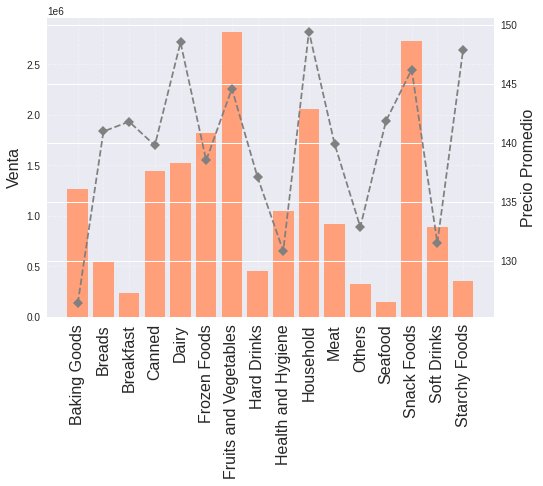

In [150]:
fig1=plt.figure(dpi=150);
fig1,ax1 = plt.subplots();

ax2 = ax1.twinx()

ax1.bar(venta_precio['Item_Type'],venta_precio['Item_Outlet_Sales'],color='lightsalmon')
ax1.set_xticklabels(venta_precio['Item_Type'], rotation=90, fontsize=16);
ax1.grid(b=False, linestyle='-.',linewidth= 0.5, alpha=0.6)

ax2.plot(venta_precio['Item_Type'],venta_precio['Item_MRP'],'gD--',color='grey')

ax1.set_ylabel('Venta',fontsize=16)
ax2.set_ylabel('Precio Promedio',fontsize=16)

plt.show()

En el grafico anterior se observa la venta de cada categoría con el precio promedio de cada uno.

Se puede concluir que la categoria con mayor venta corresponde a frutas y verduras, y su precio promedio de venta esta en $ 145. 

Por otro lado, la categoría de productos de limpieza de hogar tiene el precio promedio mayor cerca a 150 , y su venta es cercana a $ 2.000.000.

La categoría con el menor precio promedio son los productos de panadería. 

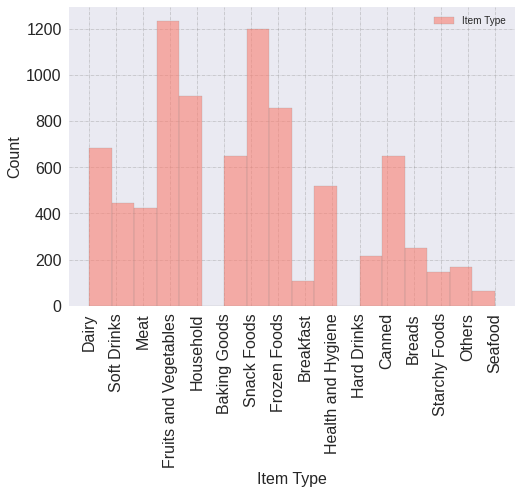

In [151]:
plt.style.use('seaborn')

df['Item_Type'].hist(bins=18, label= 'Item Type', edgecolor='grey', color='salmon',alpha=0.6);

plt.xticks(rotation=90);

plt.legend()

plt.grid(b=True, color='grey',linestyle='-.',linewidth= 0.5, alpha=0.6)

plt.xlabel('Item Type', fontsize=16)
plt.ylabel('Count', fontsize=16);

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);

De acuerdo al gráfico anterior podemos concluir lo siguiente:

La categoria con una mayor cantidad de articulos vendidos corresponde a frutas y verduras con 1.232 productos, seguido de la sección de snacks, el cual tiene 1.200 referencias vendidas. 

La categoria de productos para la limpieza del hogar y productos congelados tiene entre 800 y 1000 productos vendidos.

Por otro lado, la categoria con menos articulos corresponde a la comida de mar, la cual tiene menos de 100 referencias.  

In [152]:
venta_tienda = df.groupby(['Outlet_Size'])['Item_Outlet_Sales'].sum().reset_index() #Sacar el resumen de la venta por tamaño de tienda
venta = venta_tienda['Item_Outlet_Sales']
tienda = venta_tienda['Outlet_Size']

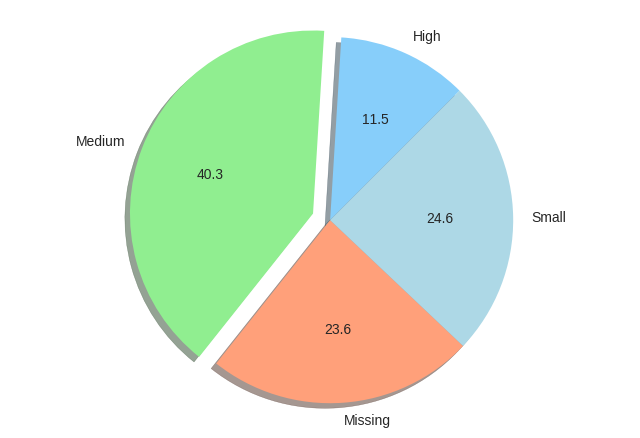

In [153]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)

explotar=[0,0.1,0,0]
colores = ['lightskyblue','lightgreen','lightsalmon','lightblue']

def absolute_value(val):
  a = np.round(val,1)
  return a

ax.pie(venta, labels=tienda, explode=explotar, shadow=True, startangle=45, autopct=absolute_value, colors= colores)
ax.axis("equal") ;

plt.show();

Se evidencia que el 24% de los articulos vendidos no tiene mapeado en que tamaño de tienda se llevó a cabo la venta. 

Con la información registrada se observa que el 40% de la venta se realiza en tiendas medianas, seguido de las tiendas pequeñas con un 25%, y solo un 11% de la venta se dió en grande almacenes.


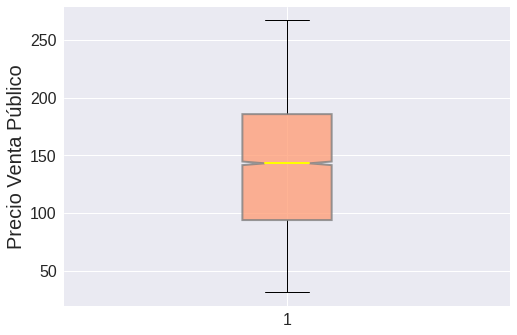

In [154]:
plt.boxplot(df['Item_MRP'],notch=True,widths=0.2,
            patch_artist=True,medianprops=dict(linestyle='-',linewidth=2,color='yellow'),
            boxprops=dict(linestyle='--',linewidth=2,color='grey',facecolor='lightsalmon',alpha=0.8));

plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.ylabel('Precio Venta Público',fontsize=20);

De acuerdo al grafico anterior se observa que el 50% de los productos tienen un precio por encima de 140. El 25% de los productos vendidos tienen un precio inferior a 98 pesos aproximadamente, y un 25% de los prodictos tienen un precio por encima de 180 pesos.

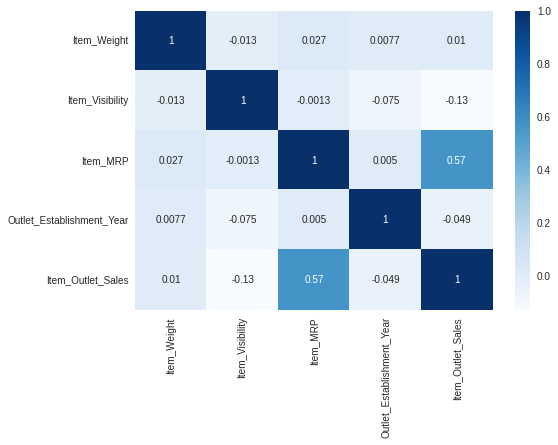

In [202]:
corr = df.corr()
sns.heatmap(corr,cmap='Blues',annot=True)

Las correlaciones entre las variables son bajas, a excepción del precio y la venta la cual presenta una correlación moderada positiva de 0.57